# Breast cancer classification

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Dataset
Wisconsin Breast Cancer Dataset (WBCD) of the FNA biopsy system.
The following code snippet loads the data from a .csv file, shows the shape of the dataset and the dataset head.

In [51]:
data = pd.read_csv('data.csv')

print(f'Dataset contains {data.shape[0]} examples, each containing {data.shape[1]} features.')
pd.set_option('display.max_colwidth', None, "display.max_rows", None, 'display.max_columns', None)
display(data.head())

Dataset contains 569 examples, each containing 32 features.


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Dataset information and description

Code block below provides the data types for all features and counts the non-null entries.
The descriptive statistics of the dataset:

- **Count:** The number of non-null values in the column.

- **Mean:** The average value of the data in the column.

- **Standard Deviation (std):** A measure of how spread out the data is. It quantifies the amount of variation or dispersion in the data.

- **Minimum (min):** The smallest value in the column.

- **25th Percentile (25%):** The value below which 25% of the data falls. This is also known as the first quartile.

- **50th Percentile (50%):** The median or middle value in the column. This is also known as the second quartile.

- **75th Percentile (75%):** The value below which 75% of the data falls. This is also known as the third quartile.

- **Maximum (max):** The largest value in the column.


In [52]:
print(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Outliers

Following code block shows the outliers in the dataset using the 1.5 IQR method

In [53]:
for column_name in data.select_dtypes(include=['number']):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

    if not outliers.empty and not column_name == 'id':
        print(f"Outliers in column '{column_name}':")
        display(outliers)

Outliers in column 'radius_mean':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,8611555,M,25.22,24.91,171.5,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.01065,0.005893,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,M,22.27,19.67,152.8,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,M,24.25,20.20,166.2,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.023330,0.09806,0.12780,0.01822,0.04547,0.009875,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
164,8712289,M,23.27,22.04,152.1,1686.0,0.08439,0.1145,0.1324,0.09702,0.1801,0.05553,0.6642,0.8561,4.603,97.85,0.004910,0.02544,0.02822,0.01623,0.01956,0.003740,28.01,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
180,873592,M,27.22,21.87,182.1,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,0.05770,0.8361,1.4810,5.820,128.70,0.004631,0.02537,0.03109,0.01241,0.01575,0.002747,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
202,878796,M,23.29,26.67,158.9,1685.0,0.11410,0.2084,0.3523,0.16200,0.2200,0.06229,0.5539,1.5600,4.667,83.16,0.009327,0.05121,0.08958,0.02465,0.02175,0.005195,25.12,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762
212,8810703,M,28.11,18.47,188.5,2499.0,0.11420,0.1516,0.3201,0.15950,0.1648,0.05525,2.8730,1.4760,21.980,525.60,0.013450,0.02772,0.06389,0.01407,0.04783,0.004476,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
236,88299702,M,23.21,26.97,153.5,1670.0,0.09509,0.1682,0.1950,0.12370,0.1909,0.06309,1.0580,0.9635,7.247,155.80,0.006428,0.02863,0.04497,0.01716,0.01590,0.003053,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
339,89812,M,23.51,24.27,155.1,1747.0,0.10690,0.1283,0.2308,0.14100,0.1797,0.05506,1.0090,0.9245,6.462,164.10,0.006292,0.01971,0.03582,0.01301,0.01479,0.003118,30.67,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738
352,899987,M,25.73,17.46,174.2,2010.0,0.11490,0.2363,0.3368,0.19130,0.1956,0.06121,0.9948,0.8509,7.222,153.10,0.006369,0.04243,0.04266,0.01508,0.02335,0.003385,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815


Outliers in column 'texture_mean':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
219,88119002,M,19.53,32.47,128.00,1223.0,0.08420,0.11300,0.114500,0.066370,0.1428,0.05313,0.7392,1.3210,4.722,109.90,0.005539,0.026440,0.026640,0.010780,0.013320,0.002256,27.90,45.41,180.20,2477.0,0.14080,0.40970,0.39950,0.16250,0.2713,0.07568
232,88203002,B,11.22,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,0.1845,0.05828,0.2239,1.6470,1.489,15.46,0.004359,0.006813,0.003223,0.003419,0.019160,0.002534,12.36,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307
239,88330202,M,17.46,39.28,113.40,920.6,0.09812,0.12980,0.141700,0.088110,0.1809,0.05966,0.5366,0.8561,3.002,49.00,0.004860,0.027850,0.026020,0.013740,0.012260,0.002759,22.51,44.87,141.20,1408.0,0.13650,0.37350,0.32410,0.20660,0.2853,0.08496
259,88725602,M,15.53,33.56,103.70,744.9,0.10630,0.16390,0.175100,0.083990,0.2091,0.06650,0.2419,1.2780,1.903,23.02,0.005345,0.025560,0.028890,0.010220,0.009947,0.003359,18.49,49.54,126.30,1035.0,0.18830,0.55640,0.57030,0.20140,0.3512,0.12040
265,88995002,M,20.73,31.12,135.70,1419.0,0.09469,0.11430,0.136700,0.086460,0.1769,0.05674,1.1720,1.6170,7.749,199.70,0.004551,0.014780,0.021430,0.009280,0.013670,0.002299,32.49,47.16,214.00,3432.0,0.14010,0.26440,0.34420,0.16590,0.2868,0.08218
455,9112085,B,13.38,30.72,86.34,557.2,0.09245,0.07426,0.028190,0.032640,0.1375,0.06016,0.3408,1.9240,2.287,28.93,0.005841,0.012460,0.007936,0.009128,0.015640,0.002985,15.05,41.61,96.69,705.6,0.11720,0.14210,0.07003,0.07763,0.2196,0.07675
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.255000,0.094290,0.2128,0.07152,0.2602,1.2050,2.362,22.65,0.004625,0.048440,0.073590,0.016080,0.021370,0.006142,17.52,42.79,128.70,915.0,0.14170,0.79170,1.17000,0.23560,0.4089,0.14090


Outliers in column 'perimeter_mean':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,8611555,M,25.22,24.91,171.5,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.01065,0.005893,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,M,22.27,19.67,152.8,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,M,24.25,20.20,166.2,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.023330,0.09806,0.12780,0.01822,0.04547,0.009875,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
164,8712289,M,23.27,22.04,152.1,1686.0,0.08439,0.1145,0.1324,0.09702,0.1801,0.05553,0.6642,0.8561,4.603,97.85,0.004910,0.02544,0.02822,0.01623,0.01956,0.003740,28.01,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
180,873592,M,27.22,21.87,182.1,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,0.05770,0.8361,1.4810,5.820,128.70,0.004631,0.02537,0.03109,0.01241,0.01575,0.002747,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
202,878796,M,23.29,26.67,158.9,1685.0,0.11410,0.2084,0.3523,0.16200,0.2200,0.06229,0.5539,1.5600,4.667,83.16,0.009327,0.05121,0.08958,0.02465,0.02175,0.005195,25.12,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762
212,8810703,M,28.11,18.47,188.5,2499.0,0.11420,0.1516,0.3201,0.15950,0.1648,0.05525,2.8730,1.4760,21.980,525.60,0.013450,0.02772,0.06389,0.01407,0.04783,0.004476,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
236,88299702,M,23.21,26.97,153.5,1670.0,0.09509,0.1682,0.1950,0.12370,0.1909,0.06309,1.0580,0.9635,7.247,155.80,0.006428,0.02863,0.04497,0.01716,0.01590,0.003053,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
339,89812,M,23.51,24.27,155.1,1747.0,0.10690,0.1283,0.2308,0.14100,0.1797,0.05506,1.0090,0.9245,6.462,164.10,0.006292,0.01971,0.03582,0.01301,0.01479,0.003118,30.67,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738
352,899987,M,25.73,17.46,174.2,2010.0,0.11490,0.2363,0.3368,0.19130,0.1956,0.06121,0.9948,0.8509,7.222,153.10,0.006369,0.04243,0.04266,0.01508,0.02335,0.003385,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815


Outliers in column 'area_mean':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
23,851509,M,21.16,23.04,137.2,1404.0,0.09428,0.10220,0.1097,0.08632,0.1769,0.05278,0.6917,1.1270,4.303,93.99,0.004728,0.01259,0.01715,0.01038,0.01083,0.001987,29.17,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526
82,8611555,M,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.3339,0.18450,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.01065,0.005893,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,M,22.27,19.67,152.8,1509.0,0.13260,0.27680,0.4264,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,M,24.25,20.20,166.2,1761.0,0.14470,0.28670,0.4268,0.20120,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.023330,0.09806,0.12780,0.01822,0.04547,0.009875,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
164,8712289,M,23.27,22.04,152.1,1686.0,0.08439,0.11450,0.1324,0.09702,0.1801,0.05553,0.6642,0.8561,4.603,97.85,0.004910,0.02544,0.02822,0.01623,0.01956,0.003740,28.01,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
180,873592,M,27.22,21.87,182.1,2250.0,0.10940,0.19140,0.2871,0.18780,0.1800,0.05770,0.8361,1.4810,5.820,128.70,0.004631,0.02537,0.03109,0.01241,0.01575,0.002747,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
202,878796,M,23.29,26.67,158.9,1685.0,0.11410,0.20840,0.3523,0.16200,0.2200,0.06229,0.5539,1.5600,4.667,83.16,0.009327,0.05121,0.08958,0.02465,0.02175,0.005195,25.12,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762
212,8810703,M,28.11,18.47,188.5,2499.0,0.11420,0.15160,0.3201,0.15950,0.1648,0.05525,2.8730,1.4760,21.980,525.60,0.013450,0.02772,0.06389,0.01407,0.04783,0.004476,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
236,88299702,M,23.21,26.97,153.5,1670.0,0.09509,0.16820,0.1950,0.12370,0.1909,0.06309,1.0580,0.9635,7.247,155.80,0.006428,0.02863,0.04497,0.01716,0.01590,0.003053,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
250,884948,M,20.94,23.56,138.9,1364.0,0.10070,0.16060,0.2712,0.13100,0.2205,0.05898,1.0040,0.8208,6.372,137.90,0.005283,0.03908,0.09518,0.01864,0.02401,0.005002,25.58,27.00,165.3,2010.0,0.1211,0.3172,0.6991,0.2105,0.3126,0.07849


Outliers in column 'smoothness_mean':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
105,863030,M,13.110,15.56,87.21,530.2,0.13980,0.17650,0.20710,0.09601,0.1925,0.07692,0.3908,0.9238,2.410,34.66,0.007162,0.02912,0.05473,0.01388,0.01547,0.007098,16.310,22.40,106.40,827.2,0.18620,0.40990,0.63760,0.19860,0.3147,0.14050
122,865423,M,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.023330,0.09806,0.12780,0.01822,0.04547,0.009875,26.020,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009
504,915186,B,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,0.2378,0.09502,0.4076,1.0930,3.014,20.04,0.009783,0.04542,0.03483,0.02188,0.02542,0.010450,10.280,16.38,69.05,300.2,0.19020,0.34410,0.20990,0.10250,0.3038,0.12520
520,917092,B,9.295,13.90,59.96,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,0.07696,0.3538,1.1300,2.388,19.63,0.015460,0.02540,0.02197,0.01580,0.03997,0.003901,10.570,17.84,67.84,326.6,0.18500,0.20970,0.09996,0.07262,0.3681,0.08982
568,92751,B,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.4280,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039


Outliers in column 'compactness_mean':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
3,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
9,84501001,M,12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750
12,846226,M,19.17,24.80,132.40,1123.0,0.0974,0.2458,0.2065,0.11180,0.2397,0.07800,0.9555,3.5680,11.070,116.20,0.003139,0.08297,0.08890,0.04090,0.04484,0.012840,20.96,29.94,151.70,1332.0,0.1037,0.3903,0.3639,0.1767,0.3176,0.10230
14,84667401,M,13.73,22.61,93.60,578.3,0.1131,0.2293,0.2128,0.08025,0.2069,0.07682,0.2121,1.1690,2.061,19.21,0.006429,0.05936,0.05501,0.01628,0.01961,0.008093,15.03,32.01,108.80,697.7,0.1651,0.7725,0.6943,0.2208,0.3596,0.14310
78,8610862,M,20.18,23.97,143.70,1245.0,0.1286,0.3454,0.3754,0.16040,0.2906,0.08142,0.9317,1.8850,8.649,116.40,0.010380,0.06835,0.10910,0.02593,0.07895,0.005987,23.37,31.72,170.30,1623.0,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964
82,8611555,M,25.22,24.91,171.50,1878.0,0.1063,0.2665,0.3339,0.18450,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.01065,0.005893,30.00,33.62,211.70,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,M,22.27,19.67,152.80,1509.0,0.1326,0.2768,0.4264,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,M,24.25,20.20,166.20,1761.0,0.1447,0.2867,0.4268,0.20120,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.023330,0.09806,0.12780,0.01822,0.04547,0.009875,26.02,23.99,180.90,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
181,873593,M,21.09,26.57,142.70,1311.0,0.1141,0.2832,0.2487,0.14960,0.2395,0.07398,0.6298,0.7629,4.414,81.46,0.004253,0.04759,0.03872,0.01567,0.01798,0.005295,26.68,33.48,176.50,2089.0,0.1491,0.7584,0.6780,0.2903,0.4098,0.12840


Outliers in column 'concavity_mean':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.2654,0.4601,0.11890
68,859471,B,9.029,17.33,58.79,250.5,0.10660,0.1413,0.3130,0.04375,0.2111,0.08046,0.3274,1.1940,1.885,17.67,0.009549,0.08606,0.30380,0.03322,0.04197,0.009559,10.31,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.1750,0.4228,0.11750
78,8610862,M,20.180,23.97,143.70,1245.0,0.12860,0.3454,0.3754,0.16040,0.2906,0.08142,0.9317,1.8850,8.649,116.40,0.010380,0.06835,0.10910,0.02593,0.07895,0.005987,23.37,31.72,170.30,1623.0,0.16390,0.6164,0.7681,0.2508,0.5440,0.09964
82,8611555,M,25.220,24.91,171.50,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.01065,0.005893,30.00,33.62,211.70,2562.0,0.15730,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,M,22.270,19.67,152.80,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.40,28.01,206.80,2360.0,0.17010,0.6997,0.9608,0.2910,0.4055,0.09789
112,86409,B,14.260,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,0.07769,0.3628,1.4900,3.399,29.25,0.005298,0.07446,0.14350,0.02292,0.02566,0.012980,15.30,23.73,107.00,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.10820
122,865423,M,24.250,20.20,166.20,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.023330,0.09806,0.12780,0.01822,0.04547,0.009875,26.02,23.99,180.90,2073.0,0.16960,0.4244,0.5803,0.2248,0.3222,0.08009
152,8710441,B,9.731,15.34,63.78,300.2,0.10720,0.1599,0.4108,0.07857,0.2548,0.09296,0.8245,2.6640,4.073,49.85,0.010970,0.09586,0.39600,0.05279,0.03546,0.029840,11.02,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.1571,0.3108,0.12590
180,873592,M,27.220,21.87,182.10,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,0.05770,0.8361,1.4810,5.820,128.70,0.004631,0.02537,0.03109,0.01241,0.01575,0.002747,33.12,32.85,220.80,3216.0,0.14720,0.4034,0.5340,0.2688,0.2856,0.08082
202,878796,M,23.290,26.67,158.90,1685.0,0.11410,0.2084,0.3523,0.16200,0.2200,0.06229,0.5539,1.5600,4.667,83.16,0.009327,0.05121,0.08958,0.02465,0.02175,0.005195,25.12,32.68,177.00,1986.0,0.15360,0.4167,0.7892,0.2733,0.3198,0.08762


Outliers in column 'concave points_mean':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
78,8610862,M,20.18,23.97,143.7,1245.0,0.1286,0.3454,0.3754,0.1604,0.2906,0.08142,0.9317,1.8850,8.649,116.40,0.010380,0.06835,0.10910,0.02593,0.07895,0.005987,23.37,31.72,170.3,1623.0,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964
82,8611555,M,25.22,24.91,171.5,1878.0,0.1063,0.2665,0.3339,0.1845,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.01065,0.005893,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,M,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,M,24.25,20.20,166.2,1761.0,0.1447,0.2867,0.4268,0.2012,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.023330,0.09806,0.12780,0.01822,0.04547,0.009875,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
180,873592,M,27.22,21.87,182.1,2250.0,0.1094,0.1914,0.2871,0.1878,0.1800,0.05770,0.8361,1.4810,5.820,128.70,0.004631,0.02537,0.03109,0.01241,0.01575,0.002747,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
202,878796,M,23.29,26.67,158.9,1685.0,0.1141,0.2084,0.3523,0.1620,0.2200,0.06229,0.5539,1.5600,4.667,83.16,0.009327,0.05121,0.08958,0.02465,0.02175,0.005195,25.12,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762
212,8810703,M,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,2.8730,1.4760,21.980,525.60,0.013450,0.02772,0.06389,0.01407,0.04783,0.004476,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
352,899987,M,25.73,17.46,174.2,2010.0,0.1149,0.2363,0.3368,0.1913,0.1956,0.06121,0.9948,0.8509,7.222,153.10,0.006369,0.04243,0.04266,0.01508,0.02335,0.003385,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
393,903516,M,21.61,22.28,144.4,1407.0,0.1167,0.2087,0.2810,0.1562,0.2162,0.06606,0.6242,0.9209,4.158,80.99,0.005215,0.03726,0.04718,0.01288,0.02045,0.004028,26.23,28.74,172.0,2081.0,0.1502,0.5717,0.7053,0.2422,0.3828,0.10070
461,911296202,M,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,0.2061,0.05623,2.5470,1.3060,18.650,542.20,0.007650,0.05374,0.08055,0.02598,0.01697,0.004558,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


Outliers in column 'symmetry_mean':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.056610,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
22,8511133,M,15.340,14.26,102.50,704.4,0.10730,0.21350,0.207700,0.09756,0.2521,0.07032,0.4388,0.7096,3.384,44.91,0.006789,0.053280,0.064460,0.022520,0.03672,0.004394,18.07,19.08,125.10,980.9,0.13900,0.59540,0.63050,0.23930,0.4667,0.09946
25,852631,M,17.140,16.40,116.00,912.7,0.11860,0.22760,0.222900,0.14010,0.3040,0.07413,1.0460,0.9760,7.276,111.40,0.008029,0.037990,0.037320,0.023970,0.02308,0.007444,22.25,21.40,152.40,1461.0,0.15450,0.39490,0.38530,0.25500,0.4066,0.10590
60,858970,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.010840,0.01290,0.2743,0.06960,0.5158,1.4410,3.312,34.62,0.007514,0.010990,0.007665,0.008193,0.04183,0.005953,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
78,8610862,M,20.180,23.97,143.70,1245.0,0.12860,0.34540,0.375400,0.16040,0.2906,0.08142,0.9317,1.8850,8.649,116.40,0.010380,0.068350,0.109100,0.025930,0.07895,0.005987,23.37,31.72,170.30,1623.0,0.16390,0.61640,0.76810,0.25080,0.5440,0.09964
108,86355,M,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.426400,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.086680,0.104000,0.024800,0.03112,0.005037,28.40,28.01,206.80,2360.0,0.17010,0.69970,0.96080,0.29100,0.4055,0.09789
122,865423,M,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.426800,0.20120,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.023330,0.098060,0.127800,0.018220,0.04547,0.009875,26.02,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009
146,869691,M,11.800,16.58,78.99,432.0,0.10910,0.17000,0.165900,0.07415,0.2678,0.07371,0.3197,1.4260,2.281,24.72,0.005427,0.036330,0.046490,0.018430,0.05628,0.004635,13.74,26.38,91.93,591.7,0.13850,0.40920,0.45040,0.18650,0.5774,0.10300
150,871001501,B,13.000,20.78,83.51,519.4,0.11350,0.07589,0.031360,0.02645,0.2540,0.06087,0.4202,1.3220,2.873,34.78,0.007017,0.011420,0.019490,0.011530,0.02951,0.001533,14.16,24.11,90.82,616.7,0.12970,0.11050,0.08112,0.06296,0.3196,0.06435
152,8710441,B,9.731,15.34,63.78,300.2,0.10720,0.15990,0.410800,0.07857,0.2548,0.09296,0.8245,2.6640,4.073,49.85,0.010970,0.095860,0.396000,0.052790,0.03546,0.029840,11.02,19.49,71.04,380.5,0.12920,0.27720,0.82160,0.15710,0.3108,0.12590


Outliers in column 'fractal_dimension_mean':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.2839,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.230,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.2396,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.940,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.090,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750
68,859471,B,9.029,17.33,58.79,250.5,0.10660,0.1413,0.31300,0.04375,0.2111,0.08046,0.3274,1.1940,1.885,17.670,0.009549,0.08606,0.30380,0.03322,0.04197,0.009559,10.310,22.65,65.50,324.7,0.1482,0.4365,1.2520,0.17500,0.4228,0.11750
71,859711,B,8.888,14.64,58.79,244.0,0.09783,0.1531,0.08606,0.02872,0.1902,0.08980,0.5262,0.8522,3.168,25.440,0.017210,0.09368,0.05671,0.01766,0.02541,0.021930,9.733,15.67,62.56,284.4,0.1207,0.2436,0.1434,0.04786,0.2254,0.10840
78,8610862,M,20.180,23.97,143.70,1245.0,0.12860,0.3454,0.37540,0.16040,0.2906,0.08142,0.9317,1.8850,8.649,116.400,0.010380,0.06835,0.10910,0.02593,0.07895,0.005987,23.370,31.72,170.30,1623.0,0.1639,0.6164,0.7681,0.25080,0.5440,0.09964
151,871001502,B,8.219,20.70,53.27,203.9,0.09405,0.1305,0.13210,0.02168,0.2222,0.08261,0.1935,1.9620,1.243,10.210,0.012430,0.05416,0.07753,0.01022,0.02309,0.011780,9.092,29.72,58.08,249.8,0.1630,0.4310,0.5381,0.07879,0.3322,0.14860
152,8710441,B,9.731,15.34,63.78,300.2,0.10720,0.1599,0.41080,0.07857,0.2548,0.09296,0.8245,2.6640,4.073,49.850,0.010970,0.09586,0.39600,0.05279,0.03546,0.029840,11.020,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.15710,0.3108,0.12590
176,872608,B,9.904,18.06,64.60,302.4,0.09699,0.1294,0.13070,0.03716,0.1669,0.08116,0.4311,2.2610,3.132,27.480,0.012860,0.08808,0.11970,0.02460,0.03880,0.017920,11.260,24.39,73.07,390.2,0.1301,0.2950,0.3486,0.09910,0.2614,0.11620
258,887181,M,15.660,23.20,110.20,773.5,0.11090,0.3114,0.31760,0.13770,0.2495,0.08104,1.2920,2.4540,10.120,138.500,0.012360,0.05995,0.08232,0.03024,0.02337,0.006042,19.850,31.64,143.70,1226.0,0.1504,0.5172,0.6181,0.24620,0.3277,0.10190
318,894329,B,9.042,18.90,60.07,244.5,0.09968,0.1972,0.19750,0.04908,0.2330,0.08743,0.4653,1.9110,3.769,24.200,0.009845,0.06590,0.10270,0.02527,0.03491,0.007877,10.060,23.40,68.62,297.1,0.1221,0.3748,0.4609,0.11450,0.3135,0.10550


Outliers in column 'radius_se':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.030030,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
12,846226,M,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,0.9555,3.5680,11.070,116.20,0.003139,0.08297,0.08890,0.04090,0.044840,0.012840,20.96,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230
25,852631,M,17.14,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,0.3040,0.07413,1.0460,0.9760,7.276,111.40,0.008029,0.03799,0.03732,0.02397,0.023080,0.007444,22.25,21.40,152.40,1461.0,0.15450,0.39490,0.38530,0.25500,0.4066,0.10590
27,852781,M,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,0.05699,0.8529,1.8490,5.632,93.54,0.010750,0.02722,0.05081,0.01911,0.022930,0.004217,21.31,27.26,139.90,1403.0,0.13380,0.21170,0.34460,0.14900,0.2341,0.07421
38,855133,M,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,1.2140,2.1880,8.077,106.00,0.006883,0.01094,0.01818,0.01917,0.007882,0.001754,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
42,855625,M,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,0.9811,1.6660,8.830,104.90,0.006548,0.10060,0.09723,0.02638,0.053330,0.007646,24.09,33.17,177.40,1651.0,0.12470,0.74440,0.72420,0.24930,0.4670,0.10380
77,8610637,M,18.05,16.15,120.20,1006.0,0.10650,0.21460,0.16840,0.10800,0.2152,0.06673,0.9806,0.5505,6.311,134.80,0.007940,0.05839,0.04658,0.02070,0.025910,0.007054,22.39,18.91,150.10,1610.0,0.14780,0.56340,0.37860,0.21020,0.3751,0.11080
78,8610862,M,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,0.08142,0.9317,1.8850,8.649,116.40,0.010380,0.06835,0.10910,0.02593,0.078950,0.005987,23.37,31.72,170.30,1623.0,0.16390,0.61640,0.76810,0.25080,0.5440,0.09964
82,8611555,M,25.22,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.18450,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.010650,0.005893,30.00,33.62,211.70,2562.0,0.15730,0.60760,0.64760,0.28670,0.2355,0.10510
108,86355,M,22.27,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.031120,0.005037,28.40,28.01,206.80,2360.0,0.17010,0.69970,0.96080,0.29100,0.4055,0.09789


Outliers in column 'texture_se':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
12,846226,M,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,0.9555,3.568,11.070,116.20,0.003139,0.082970,0.08890,0.040900,0.04484,0.012840,20.960,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230
83,8611792,M,19.100,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,0.07224,0.5190,2.910,5.801,67.10,0.007545,0.060500,0.02134,0.018430,0.03056,0.010390,20.330,32.72,141.30,1298.0,0.13920,0.28170,0.24320,0.18410,0.2311,0.09203
122,865423,M,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,0.06877,1.5090,3.120,9.807,233.00,0.023330,0.098060,0.12780,0.018220,0.04547,0.009875,26.020,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009
136,868223,B,11.710,16.67,74.72,423.6,0.10510,0.06095,0.03592,0.02600,0.1339,0.05945,0.4489,2.508,3.258,34.37,0.006578,0.013800,0.02662,0.013070,0.01359,0.003707,13.330,25.48,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343
152,8710441,B,9.731,15.34,63.78,300.2,0.10720,0.15990,0.41080,0.07857,0.2548,0.09296,0.8245,2.664,4.073,49.85,0.010970,0.095860,0.39600,0.052790,0.03546,0.029840,11.020,19.49,71.04,380.5,0.12920,0.27720,0.82160,0.15710,0.3108,0.12590
192,875099,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,0.06447,0.3539,4.885,2.230,21.69,0.001713,0.006736,0.00000,0.000000,0.03799,0.001688,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559
245,884437,B,10.480,19.86,66.72,337.7,0.10700,0.05971,0.04831,0.03070,0.1737,0.06440,0.3719,2.612,2.517,23.22,0.016040,0.013860,0.01865,0.011330,0.03476,0.003560,11.480,29.46,73.68,402.8,0.15150,0.10260,0.11810,0.06736,0.2883,0.07748
258,887181,M,15.660,23.20,110.20,773.5,0.11090,0.31140,0.31760,0.13770,0.2495,0.08104,1.2920,2.454,10.120,138.50,0.012360,0.059950,0.08232,0.030240,0.02337,0.006042,19.850,31.64,143.70,1226.0,0.15040,0.51720,0.61810,0.24620,0.3277,0.10190
314,894047,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,0.2163,0.07359,0.3368,2.777,2.222,17.81,0.020750,0.014030,0.00000,0.000000,0.06146,0.006820,8.952,22.44,56.65,240.1,0.13470,0.07767,0.00000,0.00000,0.3142,0.08116
345,898677,B,10.260,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,0.3380,2.509,2.394,19.33,0.017360,0.046710,0.02611,0.012960,0.03675,0.006758,10.880,19.48,70.89,357.1,0.13600,0.16360,0.07162,0.04074,0.2434,0.08488


Outliers in column 'perimeter_se':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.030030,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
12,846226,M,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,0.9555,3.5680,11.070,116.20,0.003139,0.08297,0.08890,0.04090,0.044840,0.012840,20.96,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230
25,852631,M,17.14,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,0.3040,0.07413,1.0460,0.9760,7.276,111.40,0.008029,0.03799,0.03732,0.02397,0.023080,0.007444,22.25,21.40,152.40,1461.0,0.15450,0.39490,0.38530,0.25500,0.4066,0.10590
38,855133,M,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,1.2140,2.1880,8.077,106.00,0.006883,0.01094,0.01818,0.01917,0.007882,0.001754,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
42,855625,M,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,0.9811,1.6660,8.830,104.90,0.006548,0.10060,0.09723,0.02638,0.053330,0.007646,24.09,33.17,177.40,1651.0,0.12470,0.74440,0.72420,0.24930,0.4670,0.10380
77,8610637,M,18.05,16.15,120.20,1006.0,0.10650,0.21460,0.16840,0.10800,0.2152,0.06673,0.9806,0.5505,6.311,134.80,0.007940,0.05839,0.04658,0.02070,0.025910,0.007054,22.39,18.91,150.10,1610.0,0.14780,0.56340,0.37860,0.21020,0.3751,0.11080
78,8610862,M,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,0.08142,0.9317,1.8850,8.649,116.40,0.010380,0.06835,0.10910,0.02593,0.078950,0.005987,23.37,31.72,170.30,1623.0,0.16390,0.61640,0.76810,0.25080,0.5440,0.09964
82,8611555,M,25.22,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.18450,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.010650,0.005893,30.00,33.62,211.70,2562.0,0.15730,0.60760,0.64760,0.28670,0.2355,0.10510
108,86355,M,22.27,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.031120,0.005037,28.40,28.01,206.80,2360.0,0.17010,0.69970,0.96080,0.29100,0.4055,0.09789
122,865423,M,24.25,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.023330,0.09806,0.12780,0.01822,0.045470,0.009875,26.02,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009


Outliers in column 'area_se':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.030030,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.020580,0.022500,0.004571,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.017560,0.005115,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
12,846226,M,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,0.9555,3.5680,11.070,116.20,0.003139,0.08297,0.08890,0.040900,0.044840,0.012840,20.96,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230
18,849014,M,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,0.05395,0.7582,1.0170,5.865,112.40,0.006494,0.01893,0.03391,0.015210,0.013560,0.001997,27.32,30.88,186.80,2398.0,0.15120,0.31500,0.53720,0.23880,0.2768,0.07615
23,851509,M,21.16,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.08632,0.1769,0.05278,0.6917,1.1270,4.303,93.99,0.004728,0.01259,0.01715,0.010380,0.010830,0.001987,29.17,35.59,188.00,2615.0,0.14010,0.26000,0.31550,0.20090,0.2822,0.07526
24,852552,M,16.65,21.38,110.00,904.6,0.11210,0.14570,0.15250,0.09170,0.1995,0.06330,0.8068,0.9017,5.455,102.60,0.006048,0.01882,0.02741,0.011300,0.014680,0.002801,26.46,31.56,177.00,2215.0,0.18050,0.35780,0.46950,0.20950,0.3613,0.09564
25,852631,M,17.14,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,0.3040,0.07413,1.0460,0.9760,7.276,111.40,0.008029,0.03799,0.03732,0.023970,0.023080,0.007444,22.25,21.40,152.40,1461.0,0.15450,0.39490,0.38530,0.25500,0.4066,0.10590
27,852781,M,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,0.05699,0.8529,1.8490,5.632,93.54,0.010750,0.02722,0.05081,0.019110,0.022930,0.004217,21.31,27.26,139.90,1403.0,0.13380,0.21170,0.34460,0.14900,0.2341,0.07421
30,853401,M,18.63,25.11,124.80,1088.0,0.10640,0.18870,0.23190,0.12440,0.2183,0.06197,0.8307,1.4660,5.574,105.00,0.006248,0.03374,0.05196,0.011580,0.020070,0.004560,23.15,34.01,160.50,1670.0,0.14910,0.42570,0.61330,0.18480,0.3444,0.09782


Outliers in column 'smoothness_se':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
71,859711,B,8.888,14.64,58.79,244.0,0.09783,0.15310,0.086060,0.028720,0.1902,0.08980,0.5262,0.8522,3.168,25.44,0.01721,0.093680,0.056710,0.017660,0.02541,0.021930,9.733,15.67,62.56,284.4,0.1207,0.24360,0.14340,0.04786,0.2254,0.10840
76,8610629,B,13.530,10.94,87.91,559.2,0.12910,0.10470,0.068770,0.065560,0.2403,0.06641,0.4101,1.0140,2.652,32.65,0.01340,0.028390,0.011620,0.008239,0.02572,0.006164,14.080,12.49,91.36,605.5,0.1451,0.13790,0.08539,0.07407,0.2710,0.07191
110,864033,B,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.017780,0.1584,0.07065,0.4030,1.4240,2.747,22.87,0.01385,0.029320,0.027220,0.010230,0.03281,0.004638,11.050,21.47,71.68,367.0,0.1467,0.17650,0.13000,0.05334,0.2533,0.08468
111,86408,B,12.630,20.76,82.15,480.4,0.09933,0.12090,0.106500,0.060210,0.1735,0.07070,0.3424,1.8030,2.711,20.48,0.01291,0.040420,0.051010,0.022950,0.02144,0.005891,13.330,25.47,89.00,527.4,0.1287,0.22500,0.22160,0.11050,0.2226,0.08486
116,864726,B,8.950,15.76,58.74,245.2,0.09462,0.12430,0.092630,0.023080,0.1305,0.07163,0.3132,0.9789,3.280,16.94,0.01835,0.067600,0.092630,0.023080,0.02384,0.005601,9.414,17.07,63.34,270.0,0.1179,0.18790,0.15440,0.03846,0.1652,0.07722
122,865423,M,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.426800,0.201200,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.02333,0.098060,0.127800,0.018220,0.04547,0.009875,26.020,23.99,180.90,2073.0,0.1696,0.42440,0.58030,0.22480,0.3222,0.08009
173,871641,B,11.080,14.71,70.21,372.7,0.10060,0.05743,0.023630,0.025830,0.1566,0.06669,0.2073,1.8050,1.377,19.08,0.01496,0.021210,0.014530,0.015830,0.03082,0.004785,11.350,16.82,72.01,396.5,0.1216,0.08240,0.03938,0.04306,0.1902,0.07313
176,872608,B,9.904,18.06,64.60,302.4,0.09699,0.12940,0.130700,0.037160,0.1669,0.08116,0.4311,2.2610,3.132,27.48,0.01286,0.088080,0.119700,0.024600,0.03880,0.017920,11.260,24.39,73.07,390.2,0.1301,0.29500,0.34860,0.09910,0.2614,0.11620
185,874158,B,10.080,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,0.1703,0.06048,0.4245,1.2680,2.680,26.43,0.01439,0.012000,0.001597,0.002404,0.02538,0.003470,11.870,21.18,75.39,437.0,0.1521,0.10190,0.00692,0.01042,0.2933,0.07697
196,875938,M,13.770,22.29,90.63,588.9,0.12000,0.12670,0.138500,0.065260,0.1834,0.06877,0.6191,2.1120,4.906,49.70,0.01380,0.033480,0.046650,0.020600,0.02689,0.004306,16.390,34.01,111.60,806.9,0.1737,0.31220,0.38090,0.16730,0.3080,0.09333


Outliers in column 'compactness_se':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.2839,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.230,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.2396,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.940,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.090,40.68,97.65,711.4,0.18530,1.0580,1.1050,0.22100,0.4366,0.20750
12,846226,M,19.170,24.80,132.40,1123.0,0.09740,0.2458,0.20650,0.11180,0.2397,0.07800,0.9555,3.5680,11.070,116.200,0.003139,0.08297,0.08890,0.04090,0.04484,0.012840,20.960,29.94,151.70,1332.0,0.10370,0.3903,0.3639,0.17670,0.3176,0.10230
42,855625,M,19.070,24.81,128.30,1104.0,0.09081,0.2190,0.21070,0.09961,0.2310,0.06343,0.9811,1.6660,8.830,104.900,0.006548,0.10060,0.09723,0.02638,0.05333,0.007646,24.090,33.17,177.40,1651.0,0.12470,0.7444,0.7242,0.24930,0.4670,0.10380
62,858986,M,14.250,22.15,96.42,645.7,0.10490,0.2008,0.21350,0.08653,0.1949,0.07292,0.7036,1.2680,5.373,60.780,0.009407,0.07056,0.06899,0.01848,0.01700,0.006113,17.670,29.51,119.10,959.5,0.16400,0.6247,0.6922,0.17850,0.2844,0.11320
68,859471,B,9.029,17.33,58.79,250.5,0.10660,0.1413,0.31300,0.04375,0.2111,0.08046,0.3274,1.1940,1.885,17.670,0.009549,0.08606,0.30380,0.03322,0.04197,0.009559,10.310,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.17500,0.4228,0.11750
71,859711,B,8.888,14.64,58.79,244.0,0.09783,0.1531,0.08606,0.02872,0.1902,0.08980,0.5262,0.8522,3.168,25.440,0.017210,0.09368,0.05671,0.01766,0.02541,0.021930,9.733,15.67,62.56,284.4,0.12070,0.2436,0.1434,0.04786,0.2254,0.10840
78,8610862,M,20.180,23.97,143.70,1245.0,0.12860,0.3454,0.37540,0.16040,0.2906,0.08142,0.9317,1.8850,8.649,116.400,0.010380,0.06835,0.10910,0.02593,0.07895,0.005987,23.370,31.72,170.30,1623.0,0.16390,0.6164,0.7681,0.25080,0.5440,0.09964
108,86355,M,22.270,19.67,152.80,1509.0,0.13260,0.2768,0.42640,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.000,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.400,28.01,206.80,2360.0,0.17010,0.6997,0.9608,0.29100,0.4055,0.09789
112,86409,B,14.260,19.65,97.83,629.9,0.07837,0.2233,0.30030,0.07798,0.1704,0.07769,0.3628,1.4900,3.399,29.250,0.005298,0.07446,0.14350,0.02292,0.02566,0.012980,15.300,23.73,107.00,709.0,0.08949,0.4193,0.6783,0.15050,0.2398,0.10820


Outliers in column 'concavity_se':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
12,846226,M,19.170,24.80,132.40,1123.0,0.09740,0.2458,0.20650,0.11180,0.2397,0.07800,0.9555,3.5680,11.070,116.200,0.003139,0.08297,0.08890,0.04090,0.04484,0.012840,20.960,29.94,151.70,1332.0,0.10370,0.3903,0.3639,0.17670,0.3176,0.10230
42,855625,M,19.070,24.81,128.30,1104.0,0.09081,0.2190,0.21070,0.09961,0.2310,0.06343,0.9811,1.6660,8.830,104.900,0.006548,0.10060,0.09723,0.02638,0.05333,0.007646,24.090,33.17,177.40,1651.0,0.12470,0.7444,0.7242,0.24930,0.4670,0.10380
68,859471,B,9.029,17.33,58.79,250.5,0.10660,0.1413,0.31300,0.04375,0.2111,0.08046,0.3274,1.1940,1.885,17.670,0.009549,0.08606,0.30380,0.03322,0.04197,0.009559,10.310,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.17500,0.4228,0.11750
78,8610862,M,20.180,23.97,143.70,1245.0,0.12860,0.3454,0.37540,0.16040,0.2906,0.08142,0.9317,1.8850,8.649,116.400,0.010380,0.06835,0.10910,0.02593,0.07895,0.005987,23.370,31.72,170.30,1623.0,0.16390,0.6164,0.7681,0.25080,0.5440,0.09964
108,86355,M,22.270,19.67,152.80,1509.0,0.13260,0.2768,0.42640,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.000,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.400,28.01,206.80,2360.0,0.17010,0.6997,0.9608,0.29100,0.4055,0.09789
112,86409,B,14.260,19.65,97.83,629.9,0.07837,0.2233,0.30030,0.07798,0.1704,0.07769,0.3628,1.4900,3.399,29.250,0.005298,0.07446,0.14350,0.02292,0.02566,0.012980,15.300,23.73,107.00,709.0,0.08949,0.4193,0.6783,0.15050,0.2398,0.10820
116,864726,B,8.950,15.76,58.74,245.2,0.09462,0.1243,0.09263,0.02308,0.1305,0.07163,0.3132,0.9789,3.280,16.940,0.018350,0.06760,0.09263,0.02308,0.02384,0.005601,9.414,17.07,63.34,270.0,0.11790,0.1879,0.1544,0.03846,0.1652,0.07722
122,865423,M,24.250,20.20,166.20,1761.0,0.14470,0.2867,0.42680,0.20120,0.2655,0.06877,1.5090,3.1200,9.807,233.000,0.023330,0.09806,0.12780,0.01822,0.04547,0.009875,26.020,23.99,180.90,2073.0,0.16960,0.4244,0.5803,0.22480,0.3222,0.08009
152,8710441,B,9.731,15.34,63.78,300.2,0.10720,0.1599,0.41080,0.07857,0.2548,0.09296,0.8245,2.6640,4.073,49.850,0.010970,0.09586,0.39600,0.05279,0.03546,0.029840,11.020,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.15710,0.3108,0.12590
176,872608,B,9.904,18.06,64.60,302.4,0.09699,0.1294,0.13070,0.03716,0.1669,0.08116,0.4311,2.2610,3.132,27.480,0.012860,0.08808,0.11970,0.02460,0.03880,0.017920,11.260,24.39,73.07,390.2,0.13010,0.2950,0.3486,0.09910,0.2614,0.11620


Outliers in column 'concave points_se':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
12,846226,M,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,0.9555,3.5680,11.070,116.200,0.003139,0.08297,0.08890,0.04090,0.04484,0.012840,20.96,29.94,151.70,1332.0,0.10370,0.3903,0.3639,0.17670,0.3176,0.10230
42,855625,M,19.070,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,0.9811,1.6660,8.830,104.900,0.006548,0.10060,0.09723,0.02638,0.05333,0.007646,24.09,33.17,177.40,1651.0,0.12470,0.7444,0.7242,0.24930,0.4670,0.10380
68,859471,B,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,0.3274,1.1940,1.885,17.670,0.009549,0.08606,0.30380,0.03322,0.04197,0.009559,10.31,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.17500,0.4228,0.11750
78,8610862,M,20.180,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,0.08142,0.9317,1.8850,8.649,116.400,0.010380,0.06835,0.10910,0.02593,0.07895,0.005987,23.37,31.72,170.30,1623.0,0.16390,0.6164,0.7681,0.25080,0.5440,0.09964
138,868826,M,14.950,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,0.1957,0.06216,1.2960,1.4520,8.419,101.900,0.010000,0.03480,0.06577,0.02801,0.05168,0.002887,18.55,21.43,121.40,971.4,0.14110,0.2164,0.3355,0.16670,0.3414,0.07147
152,8710441,B,9.731,15.34,63.78,300.2,0.10720,0.15990,0.41080,0.07857,0.2548,0.09296,0.8245,2.6640,4.073,49.850,0.010970,0.09586,0.39600,0.05279,0.03546,0.029840,11.02,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.15710,0.3108,0.12590
161,8711803,M,19.190,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,1.0000,0.6336,6.971,119.300,0.009406,0.03055,0.04344,0.02794,0.03156,0.003362,22.03,17.81,146.60,1495.0,0.11240,0.2016,0.2264,0.17770,0.2443,0.06251
210,881046502,M,20.580,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,0.05024,0.8601,1.4800,7.029,111.700,0.008124,0.03611,0.05489,0.02765,0.03176,0.002365,23.24,27.84,158.30,1656.0,0.11780,0.2920,0.3861,0.19200,0.2909,0.05865
213,881094802,M,17.420,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,0.05866,0.5296,1.6670,3.767,58.530,0.031130,0.08555,0.14380,0.03927,0.02175,0.012560,18.07,28.07,120.40,1021.0,0.12430,0.1793,0.2803,0.10990,0.1603,0.06818
258,887181,M,15.660,23.20,110.20,773.5,0.11090,0.31140,0.31760,0.13770,0.2495,0.08104,1.2920,2.4540,10.120,138.500,0.012360,0.05995,0.08232,0.03024,0.02337,0.006042,19.85,31.64,143.70,1226.0,0.15040,0.5172,0.6181,0.24620,0.3277,0.10190


Outliers in column 'symmetry_se':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.056610,0.018670,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
12,846226,M,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.206500,0.111800,0.2397,0.07800,0.9555,3.5680,11.070,116.20,0.003139,0.082970,0.088900,0.040900,0.04484,0.012840,20.960,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230
22,8511133,M,15.340,14.26,102.50,704.4,0.10730,0.21350,0.207700,0.097560,0.2521,0.07032,0.4388,0.7096,3.384,44.91,0.006789,0.053280,0.064460,0.022520,0.03672,0.004394,18.070,19.08,125.10,980.9,0.13900,0.59540,0.63050,0.23930,0.4667,0.09946
42,855625,M,19.070,24.81,128.30,1104.0,0.09081,0.21900,0.210700,0.099610,0.2310,0.06343,0.9811,1.6660,8.830,104.90,0.006548,0.100600,0.097230,0.026380,0.05333,0.007646,24.090,33.17,177.40,1651.0,0.12470,0.74440,0.72420,0.24930,0.4670,0.10380
60,858970,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.010840,0.012900,0.2743,0.06960,0.5158,1.4410,3.312,34.62,0.007514,0.010990,0.007665,0.008193,0.04183,0.005953,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
63,859196,B,9.173,13.86,59.20,260.9,0.07721,0.08751,0.059880,0.021800,0.2341,0.06963,0.4098,2.2650,2.608,23.52,0.008738,0.039380,0.043120,0.015600,0.04192,0.005822,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
68,859471,B,9.029,17.33,58.79,250.5,0.10660,0.14130,0.313000,0.043750,0.2111,0.08046,0.3274,1.1940,1.885,17.67,0.009549,0.086060,0.303800,0.033220,0.04197,0.009559,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
78,8610862,M,20.180,23.97,143.70,1245.0,0.12860,0.34540,0.375400,0.160400,0.2906,0.08142,0.9317,1.8850,8.649,116.40,0.010380,0.068350,0.109100,0.025930,0.07895,0.005987,23.370,31.72,170.30,1623.0,0.16390,0.61640,0.76810,0.25080,0.5440,0.09964
119,865128,M,17.950,20.01,114.20,982.0,0.08402,0.06722,0.072930,0.055960,0.2129,0.05025,0.5506,1.2140,3.357,54.04,0.004024,0.008422,0.022910,0.009863,0.05014,0.001902,20.580,27.83,129.20,1261.0,0.10720,0.12020,0.22490,0.11850,0.4882,0.06111
122,865423,M,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.426800,0.201200,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.023330,0.098060,0.127800,0.018220,0.04547,0.009875,26.020,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009


Outliers in column 'fractal_dimension_se':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.2839,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.230,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.2396,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.940,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.090,40.68,97.65,711.4,0.18530,1.0580,1.1050,0.22100,0.4366,0.20750
12,846226,M,19.170,24.80,132.40,1123.0,0.09740,0.2458,0.20650,0.11180,0.2397,0.07800,0.9555,3.5680,11.070,116.200,0.003139,0.08297,0.08890,0.04090,0.04484,0.012840,20.960,29.94,151.70,1332.0,0.10370,0.3903,0.3639,0.17670,0.3176,0.10230
14,84667401,M,13.730,22.61,93.60,578.3,0.11310,0.2293,0.21280,0.08025,0.2069,0.07682,0.2121,1.1690,2.061,19.210,0.006429,0.05936,0.05501,0.01628,0.01961,0.008093,15.030,32.01,108.80,697.7,0.16510,0.7725,0.6943,0.22080,0.3596,0.14310
68,859471,B,9.029,17.33,58.79,250.5,0.10660,0.1413,0.31300,0.04375,0.2111,0.08046,0.3274,1.1940,1.885,17.670,0.009549,0.08606,0.30380,0.03322,0.04197,0.009559,10.310,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.17500,0.4228,0.11750
71,859711,B,8.888,14.64,58.79,244.0,0.09783,0.1531,0.08606,0.02872,0.1902,0.08980,0.5262,0.8522,3.168,25.440,0.017210,0.09368,0.05671,0.01766,0.02541,0.021930,9.733,15.67,62.56,284.4,0.12070,0.2436,0.1434,0.04786,0.2254,0.10840
83,8611792,M,19.100,26.29,129.10,1132.0,0.12150,0.1791,0.19370,0.14690,0.1634,0.07224,0.5190,2.9100,5.801,67.100,0.007545,0.06050,0.02134,0.01843,0.03056,0.010390,20.330,32.72,141.30,1298.0,0.13920,0.2817,0.2432,0.18410,0.2311,0.09203
112,86409,B,14.260,19.65,97.83,629.9,0.07837,0.2233,0.30030,0.07798,0.1704,0.07769,0.3628,1.4900,3.399,29.250,0.005298,0.07446,0.14350,0.02292,0.02566,0.012980,15.300,23.73,107.00,709.0,0.08949,0.4193,0.6783,0.15050,0.2398,0.10820
122,865423,M,24.250,20.20,166.20,1761.0,0.14470,0.2867,0.42680,0.20120,0.2655,0.06877,1.5090,3.1200,9.807,233.000,0.023330,0.09806,0.12780,0.01822,0.04547,0.009875,26.020,23.99,180.90,2073.0,0.16960,0.4244,0.5803,0.22480,0.3222,0.08009
145,869476,B,11.900,14.65,78.11,432.8,0.11520,0.1296,0.03710,0.03003,0.1995,0.07839,0.3962,0.6538,3.021,25.030,0.010170,0.04741,0.02789,0.01110,0.03127,0.009423,13.150,16.51,86.26,509.6,0.14240,0.2517,0.0942,0.06042,0.2727,0.10360


Outliers in column 'radius_worst':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
23,851509,M,21.16,23.04,137.2,1404.0,0.09428,0.10220,0.1097,0.08632,0.1769,0.05278,0.6917,1.1270,4.303,93.99,0.004728,0.01259,0.01715,0.01038,0.01083,0.001987,29.17,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526
82,8611555,M,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.3339,0.18450,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.01065,0.005893,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,M,22.27,19.67,152.8,1509.0,0.13260,0.27680,0.4264,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
164,8712289,M,23.27,22.04,152.1,1686.0,0.08439,0.11450,0.1324,0.09702,0.1801,0.05553,0.6642,0.8561,4.603,97.85,0.004910,0.02544,0.02822,0.01623,0.01956,0.003740,28.01,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
180,873592,M,27.22,21.87,182.1,2250.0,0.10940,0.19140,0.2871,0.18780,0.1800,0.05770,0.8361,1.4810,5.820,128.70,0.004631,0.02537,0.03109,0.01241,0.01575,0.002747,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
212,8810703,M,28.11,18.47,188.5,2499.0,0.11420,0.15160,0.3201,0.15950,0.1648,0.05525,2.8730,1.4760,21.980,525.60,0.013450,0.02772,0.06389,0.01407,0.04783,0.004476,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
219,88119002,M,19.53,32.47,128.0,1223.0,0.08420,0.11300,0.1145,0.06637,0.1428,0.05313,0.7392,1.3210,4.722,109.90,0.005539,0.02644,0.02664,0.01078,0.01332,0.002256,27.90,45.41,180.2,2477.0,0.1408,0.4097,0.3995,0.1625,0.2713,0.07568
236,88299702,M,23.21,26.97,153.5,1670.0,0.09509,0.16820,0.1950,0.12370,0.1909,0.06309,1.0580,0.9635,7.247,155.80,0.006428,0.02863,0.04497,0.01716,0.01590,0.003053,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
265,88995002,M,20.73,31.12,135.7,1419.0,0.09469,0.11430,0.1367,0.08646,0.1769,0.05674,1.1720,1.6170,7.749,199.70,0.004551,0.01478,0.02143,0.00928,0.01367,0.002299,32.49,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218
272,8910988,M,21.75,20.99,147.3,1491.0,0.09401,0.19610,0.2195,0.10880,0.1721,0.06194,1.1670,1.3520,8.867,156.80,0.005687,0.04960,0.06329,0.01561,0.01924,0.004614,28.19,28.18,195.9,2384.0,0.1272,0.4725,0.5807,0.1841,0.2833,0.08858


Outliers in column 'texture_worst':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
219,88119002,M,19.53,32.47,128.0,1223.0,0.08420,0.1130,0.1145,0.06637,0.1428,0.05313,0.7392,1.3210,4.722,109.90,0.005539,0.02644,0.02664,0.01078,0.013320,0.002256,27.90,45.41,180.2,2477.0,0.1408,0.4097,0.3995,0.1625,0.2713,0.07568
239,88330202,M,17.46,39.28,113.4,920.6,0.09812,0.1298,0.1417,0.08811,0.1809,0.05966,0.5366,0.8561,3.002,49.00,0.004860,0.02785,0.02602,0.01374,0.012260,0.002759,22.51,44.87,141.2,1408.0,0.1365,0.3735,0.3241,0.2066,0.2853,0.08496
259,88725602,M,15.53,33.56,103.7,744.9,0.10630,0.1639,0.1751,0.08399,0.2091,0.06650,0.2419,1.2780,1.903,23.02,0.005345,0.02556,0.02889,0.01022,0.009947,0.003359,18.49,49.54,126.3,1035.0,0.1883,0.5564,0.5703,0.2014,0.3512,0.12040
265,88995002,M,20.73,31.12,135.7,1419.0,0.09469,0.1143,0.1367,0.08646,0.1769,0.05674,1.1720,1.6170,7.749,199.70,0.004551,0.01478,0.02143,0.00928,0.013670,0.002299,32.49,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218
562,925622,M,15.22,30.62,103.4,716.9,0.10480,0.2087,0.2550,0.09429,0.2128,0.07152,0.2602,1.2050,2.362,22.65,0.004625,0.04844,0.07359,0.01608,0.021370,0.006142,17.52,42.79,128.7,915.0,0.1417,0.7917,1.1700,0.2356,0.4089,0.14090


Outliers in column 'perimeter_worst':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
23,851509,M,21.16,23.04,137.2,1404.0,0.09428,0.10220,0.1097,0.08632,0.1769,0.05278,0.6917,1.1270,4.303,93.99,0.004728,0.01259,0.01715,0.01038,0.01083,0.001987,29.17,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526
82,8611555,M,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.3339,0.18450,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.01065,0.005893,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,M,22.27,19.67,152.8,1509.0,0.13260,0.27680,0.4264,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
180,873592,M,27.22,21.87,182.1,2250.0,0.10940,0.19140,0.2871,0.18780,0.1800,0.05770,0.8361,1.4810,5.820,128.70,0.004631,0.02537,0.03109,0.01241,0.01575,0.002747,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
212,8810703,M,28.11,18.47,188.5,2499.0,0.11420,0.15160,0.3201,0.15950,0.1648,0.05525,2.8730,1.4760,21.980,525.60,0.013450,0.02772,0.06389,0.01407,0.04783,0.004476,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
236,88299702,M,23.21,26.97,153.5,1670.0,0.09509,0.16820,0.1950,0.12370,0.1909,0.06309,1.0580,0.9635,7.247,155.80,0.006428,0.02863,0.04497,0.01716,0.01590,0.003053,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
265,88995002,M,20.73,31.12,135.7,1419.0,0.09469,0.11430,0.1367,0.08646,0.1769,0.05674,1.1720,1.6170,7.749,199.70,0.004551,0.01478,0.02143,0.00928,0.01367,0.002299,32.49,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218
272,8910988,M,21.75,20.99,147.3,1491.0,0.09401,0.19610,0.2195,0.10880,0.1721,0.06194,1.1670,1.3520,8.867,156.80,0.005687,0.04960,0.06329,0.01561,0.01924,0.004614,28.19,28.18,195.9,2384.0,0.1272,0.4725,0.5807,0.1841,0.2833,0.08858
339,89812,M,23.51,24.27,155.1,1747.0,0.10690,0.12830,0.2308,0.14100,0.1797,0.05506,1.0090,0.9245,6.462,164.10,0.006292,0.01971,0.03582,0.01301,0.01479,0.003118,30.67,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738
352,899987,M,25.73,17.46,174.2,2010.0,0.11490,0.23630,0.3368,0.19130,0.1956,0.06121,0.9948,0.8509,7.222,153.10,0.006369,0.04243,0.04266,0.01508,0.02335,0.003385,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815


Outliers in column 'area_worst':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
18,849014,M,19.81,22.15,130.0,1260.0,0.09831,0.10270,0.1479,0.09498,0.1582,0.05395,0.7582,1.0170,5.865,112.40,0.006494,0.01893,0.03391,0.01521,0.01356,0.001997,27.32,30.88,186.8,2398.0,0.1512,0.3150,0.5372,0.2388,0.2768,0.07615
23,851509,M,21.16,23.04,137.2,1404.0,0.09428,0.10220,0.1097,0.08632,0.1769,0.05278,0.6917,1.1270,4.303,93.99,0.004728,0.01259,0.01715,0.01038,0.01083,0.001987,29.17,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526
24,852552,M,16.65,21.38,110.0,904.6,0.11210,0.14570,0.1525,0.09170,0.1995,0.06330,0.8068,0.9017,5.455,102.60,0.006048,0.01882,0.02741,0.01130,0.01468,0.002801,26.46,31.56,177.0,2215.0,0.1805,0.3578,0.4695,0.2095,0.3613,0.09564
56,857637,M,19.21,18.57,125.5,1152.0,0.10530,0.12670,0.1323,0.08994,0.1917,0.05961,0.7275,1.1930,4.837,102.50,0.006458,0.02306,0.02945,0.01538,0.01852,0.002608,26.14,28.14,170.1,2145.0,0.1624,0.3511,0.3879,0.2091,0.3537,0.08294
82,8611555,M,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.3339,0.18450,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.01065,0.005893,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,M,22.27,19.67,152.8,1509.0,0.13260,0.27680,0.4264,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,M,24.25,20.20,166.2,1761.0,0.14470,0.28670,0.4268,0.20120,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.023330,0.09806,0.12780,0.01822,0.04547,0.009875,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
162,871201,M,19.59,18.15,130.7,1214.0,0.11200,0.16660,0.2508,0.12860,0.2027,0.06082,0.7364,1.0480,4.792,97.07,0.004057,0.02277,0.04029,0.01303,0.01686,0.003318,26.73,26.39,174.9,2232.0,0.1438,0.3846,0.6810,0.2247,0.3643,0.09223


Outliers in column 'smoothness_worst':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,M,11.420,20.38,77.58,386.1,0.1425,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.009110,0.074580,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
41,855563,M,10.950,21.35,71.90,371.1,0.1227,0.12180,0.1044,0.05669,0.1895,0.06870,0.2366,1.428,1.822,16.97,0.008064,0.017640,0.02595,0.01037,0.01357,0.003040,12.840,35.34,87.22,514.0,0.19090,0.26980,0.4023,0.1424,0.2964,0.09606
192,875099,B,9.720,18.22,60.73,288.1,0.0695,0.02344,0.0000,0.00000,0.1653,0.06447,0.3539,4.885,2.230,21.69,0.001713,0.006736,0.00000,0.00000,0.03799,0.001688,9.968,20.83,62.25,303.8,0.07117,0.02729,0.0000,0.0000,0.1909,0.06559
203,87880,M,13.810,23.75,91.56,597.8,0.1323,0.17680,0.1558,0.09176,0.2251,0.07421,0.5648,1.930,3.909,52.72,0.008824,0.031080,0.03112,0.01291,0.01998,0.004506,19.200,41.85,128.50,1153.0,0.22260,0.52090,0.4646,0.2013,0.4432,0.10860
379,9013838,M,11.080,18.83,73.30,361.6,0.1216,0.21540,0.1689,0.06367,0.2196,0.07950,0.2114,1.027,1.719,13.99,0.007405,0.045490,0.04588,0.01339,0.01738,0.004435,13.240,32.82,91.76,508.1,0.21840,0.93790,0.8402,0.2524,0.4154,0.14030
504,915186,B,9.268,12.87,61.49,248.7,0.1634,0.22390,0.0973,0.05252,0.2378,0.09502,0.4076,1.093,3.014,20.04,0.009783,0.045420,0.03483,0.02188,0.02542,0.010450,10.280,16.38,69.05,300.2,0.19020,0.34410,0.2099,0.1025,0.3038,0.12520
505,915276,B,9.676,13.14,64.12,272.5,0.1255,0.22040,0.1188,0.07038,0.2057,0.09575,0.2744,1.390,1.787,17.67,0.021770,0.048880,0.05189,0.01450,0.02632,0.011480,10.600,18.04,69.47,328.1,0.20060,0.36630,0.2913,0.1075,0.2848,0.13640


Outliers in column 'compactness_worst':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.2396,0.2273,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750
14,84667401,M,13.73,22.61,93.60,578.3,0.11310,0.2293,0.2128,0.08025,0.2069,0.07682,0.2121,1.1690,2.061,19.21,0.006429,0.05936,0.05501,0.016280,0.01961,0.008093,15.03,32.01,108.80,697.7,0.1651,0.7725,0.6943,0.2208,0.3596,0.14310
15,84799002,M,14.54,27.54,96.73,658.8,0.11390,0.1595,0.1639,0.07364,0.2303,0.07077,0.3700,1.0330,2.879,32.55,0.005607,0.04240,0.04741,0.010900,0.01857,0.005466,17.46,37.13,124.10,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410
26,852763,M,14.58,21.53,97.41,644.8,0.10540,0.1868,0.1425,0.08783,0.2252,0.06924,0.2545,0.9832,2.110,21.05,0.004452,0.03055,0.02681,0.013520,0.01454,0.003711,17.62,33.21,122.40,896.9,0.1525,0.6643,0.5539,0.2701,0.4264,0.12750
33,854002,M,19.27,26.47,127.90,1162.0,0.09401,0.1719,0.1657,0.07593,0.1853,0.06261,0.5558,0.6062,3.528,68.17,0.005015,0.03318,0.03497,0.009643,0.01543,0.003896,24.15,30.90,161.40,1813.0,0.1509,0.6590,0.6091,0.1785,0.3672,0.11230
42,855625,M,19.07,24.81,128.30,1104.0,0.09081,0.2190,0.2107,0.09961,0.2310,0.06343,0.9811,1.6660,8.830,104.90,0.006548,0.10060,0.09723,0.026380,0.05333,0.007646,24.09,33.17,177.40,1651.0,0.1247,0.7444,0.7242,0.2493,0.4670,0.10380
72,859717,M,17.20,24.52,114.20,929.4,0.10710,0.1830,0.1692,0.07944,0.1927,0.06487,0.5907,1.0410,3.705,69.47,0.005820,0.05616,0.04252,0.011270,0.01527,0.006299,23.32,33.82,151.60,1681.0,0.1585,0.7394,0.6566,0.1899,0.3313,0.13390
108,86355,M,22.27,19.67,152.80,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.024800,0.03112,0.005037,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789


Outliers in column 'concavity_worst':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.2396,0.2273,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750
68,859471,B,9.029,17.33,58.79,250.5,0.10660,0.1413,0.3130,0.04375,0.2111,0.08046,0.3274,1.1940,1.885,17.67,0.009549,0.08606,0.30380,0.03322,0.04197,0.009559,10.31,22.65,65.50,324.7,0.1482,0.4365,1.2520,0.1750,0.4228,0.11750
108,86355,M,22.270,19.67,152.80,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
152,8710441,B,9.731,15.34,63.78,300.2,0.10720,0.1599,0.4108,0.07857,0.2548,0.09296,0.8245,2.6640,4.073,49.85,0.010970,0.09586,0.39600,0.05279,0.03546,0.029840,11.02,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.1571,0.3108,0.12590
190,874858,M,14.220,23.12,94.37,609.9,0.10750,0.2413,0.1981,0.06618,0.2384,0.07542,0.2860,2.1100,2.112,31.72,0.007970,0.13540,0.11660,0.01666,0.05113,0.011720,15.74,37.18,106.40,762.4,0.1533,0.9327,0.8488,0.1772,0.5166,0.14460
202,878796,M,23.290,26.67,158.90,1685.0,0.11410,0.2084,0.3523,0.16200,0.2200,0.06229,0.5539,1.5600,4.667,83.16,0.009327,0.05121,0.08958,0.02465,0.02175,0.005195,25.12,32.68,177.00,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762
252,885429,M,19.730,19.82,130.70,1206.0,0.10620,0.1849,0.2417,0.09740,0.1733,0.06697,0.7661,0.7800,4.115,92.81,0.008482,0.05057,0.06800,0.01971,0.01467,0.007259,25.28,25.59,159.80,1933.0,0.1710,0.5955,0.8489,0.2507,0.2749,0.12970
379,9013838,M,11.080,18.83,73.30,361.6,0.12160,0.2154,0.1689,0.06367,0.2196,0.07950,0.2114,1.0270,1.719,13.99,0.007405,0.04549,0.04588,0.01339,0.01738,0.004435,13.24,32.82,91.76,508.1,0.2184,0.9379,0.8402,0.2524,0.4154,0.14030
400,90439701,M,17.910,21.02,124.40,994.0,0.12300,0.2576,0.3189,0.11980,0.2113,0.07115,0.4030,0.7747,3.123,41.51,0.007159,0.03718,0.06165,0.01051,0.01591,0.005099,20.80,27.78,149.60,1304.0,0.1873,0.5917,0.9034,0.1964,0.3245,0.11980
430,907914,M,14.900,22.53,102.10,685.0,0.09947,0.2225,0.2733,0.09711,0.2041,0.06898,0.2530,0.8749,3.466,24.19,0.006965,0.06213,0.07926,0.02234,0.01499,0.005784,16.35,27.57,125.40,832.7,0.1419,0.7090,0.9019,0.2475,0.2866,0.11550


Outliers in column 'symmetry_worst':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750
15,84799002,M,14.540,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,0.07077,0.3700,1.0330,2.879,32.55,0.005607,0.042400,0.04741,0.010900,0.01857,0.005466,17.46,37.13,124.10,943.2,0.1678,0.6577,0.7026,0.17120,0.4218,0.13410
22,8511133,M,15.340,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.09756,0.2521,0.07032,0.4388,0.7096,3.384,44.91,0.006789,0.053280,0.06446,0.022520,0.03672,0.004394,18.07,19.08,125.10,980.9,0.1390,0.5954,0.6305,0.23930,0.4667,0.09946
26,852763,M,14.580,21.53,97.41,644.8,0.10540,0.18680,0.14250,0.08783,0.2252,0.06924,0.2545,0.9832,2.110,21.05,0.004452,0.030550,0.02681,0.013520,0.01454,0.003711,17.62,33.21,122.40,896.9,0.1525,0.6643,0.5539,0.27010,0.4264,0.12750
31,853612,M,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,0.2301,0.07799,0.4825,1.0300,3.475,41.00,0.005551,0.034140,0.04205,0.010440,0.02273,0.005667,16.82,28.12,119.40,888.7,0.1637,0.5775,0.6956,0.15460,0.4761,0.14020
34,854039,M,16.130,17.88,107.00,807.2,0.10400,0.15590,0.13540,0.07752,0.1998,0.06515,0.3340,0.6857,2.183,35.03,0.004185,0.028680,0.02664,0.009067,0.01703,0.003817,20.21,27.26,132.70,1261.0,0.1446,0.5804,0.5274,0.18640,0.4270,0.12330
35,854253,M,16.740,21.59,110.10,869.5,0.09610,0.13360,0.13480,0.06018,0.1896,0.05656,0.4615,0.9197,3.008,45.19,0.005776,0.024990,0.03695,0.011950,0.02789,0.002665,20.01,29.02,133.50,1229.0,0.1563,0.3835,0.5409,0.18130,0.4863,0.08633


Outliers in column 'fractal_dimension_worst':


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.910,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.1730
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.1700,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.011370,0.02165,0.005082,15.470,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.1244
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.2396,0.2273,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.014320,0.01789,0.010080,15.090,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.2075
14,84667401,M,13.730,22.61,93.60,578.3,0.11310,0.2293,0.2128,0.08025,0.2069,0.07682,0.2121,1.1690,2.061,19.21,0.006429,0.05936,0.05501,0.016280,0.01961,0.008093,15.030,32.01,108.80,697.7,0.1651,0.7725,0.6943,0.22080,0.3596,0.1431
15,84799002,M,14.540,27.54,96.73,658.8,0.11390,0.1595,0.1639,0.07364,0.2303,0.07077,0.3700,1.0330,2.879,32.55,0.005607,0.04240,0.04741,0.010900,0.01857,0.005466,17.460,37.13,124.10,943.2,0.1678,0.6577,0.7026,0.17120,0.4218,0.1341
26,852763,M,14.580,21.53,97.41,644.8,0.10540,0.1868,0.1425,0.08783,0.2252,0.06924,0.2545,0.9832,2.110,21.05,0.004452,0.03055,0.02681,0.013520,0.01454,0.003711,17.620,33.21,122.40,896.9,0.1525,0.6643,0.5539,0.27010,0.4264,0.1275
31,853612,M,11.840,18.70,77.93,440.6,0.11090,0.1516,0.1218,0.05182,0.2301,0.07799,0.4825,1.0300,3.475,41.00,0.005551,0.03414,0.04205,0.010440,0.02273,0.005667,16.820,28.12,119.40,888.7,0.1637,0.5775,0.6956,0.15460,0.4761,0.1402
34,854039,M,16.130,17.88,107.00,807.2,0.10400,0.1559,0.1354,0.07752,0.1998,0.06515,0.3340,0.6857,2.183,35.03,0.004185,0.02868,0.02664,0.009067,0.01703,0.003817,20.210,27.26,132.70,1261.0,0.1446,0.5804,0.5274,0.18640,0.4270,0.1233
72,859717,M,17.200,24.52,114.20,929.4,0.10710,0.1830,0.1692,0.07944,0.1927,0.06487,0.5907,1.0410,3.705,69.47,0.005820,0.05616,0.04252,0.011270,0.01527,0.006299,23.320,33.82,151.60,1681.0,0.1585,0.7394,0.6566,0.18990,0.3313,0.1339
105,863030,M,13.110,15.56,87.21,530.2,0.13980,0.1765,0.2071,0.09601,0.1925,0.07692,0.3908,0.9238,2.410,34.66,0.007162,0.02912,0.05473,0.013880,0.01547,0.007098,16.310,22.40,106.40,827.2,0.1862,0.4099,0.6376,0.19860,0.3147,0.1405


## Data visualization
### a) Malignant-Benign ratio

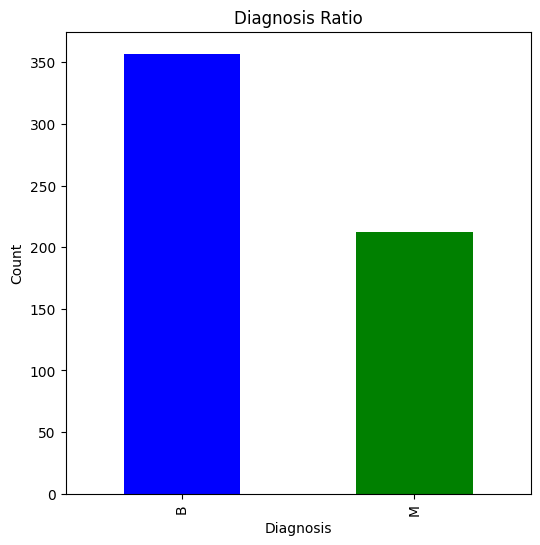

In [54]:
diagnosis_counts = data['diagnosis'].value_counts()

plt.figure(figsize=(6, 6))
diagnosis_counts.plot(kind='bar', color=['b', 'g'])
plt.title('Diagnosis Ratio')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

### b) Diagnosis depending on the radius mean and concavity

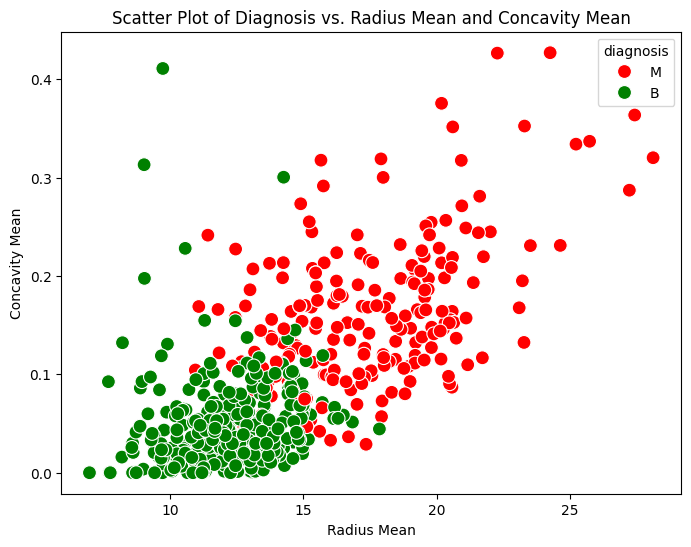

In [70]:
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x='radius_mean', y='concavity_mean', data=data, hue='diagnosis', palette={'M': 'red', 'B': 'green'}, s=100)
plt.title('Scatter Plot of Diagnosis vs. Radius Mean and Concavity Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Concavity Mean')
plt.show()

### c) Area frequency histogram

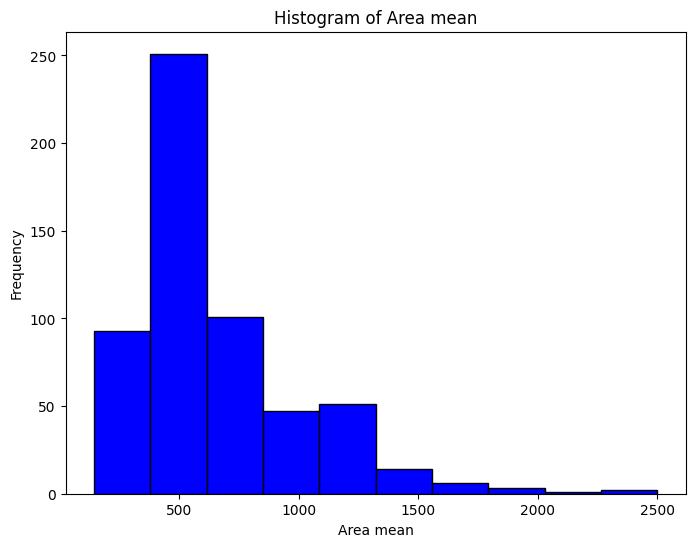

In [73]:
plt.figure(figsize=(8, 6))
plt.hist(data['area_mean'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Area mean')
plt.xlabel('Area mean')
plt.ylabel('Frequency')
plt.show()

### d) Compactness mean box-plot
1.5 IQR outlier borders

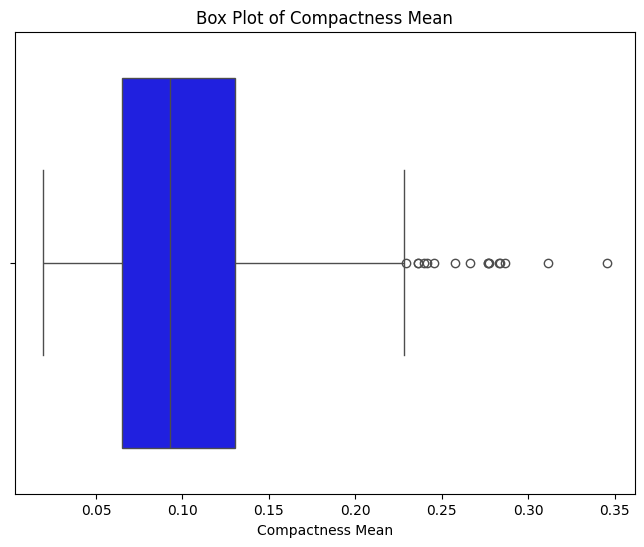

In [74]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['compactness_mean'], color='blue')
plt.title('Box Plot of Compactness Mean')
plt.xlabel('Compactness Mean')
plt.show()

### e) Correlation heatmap for means

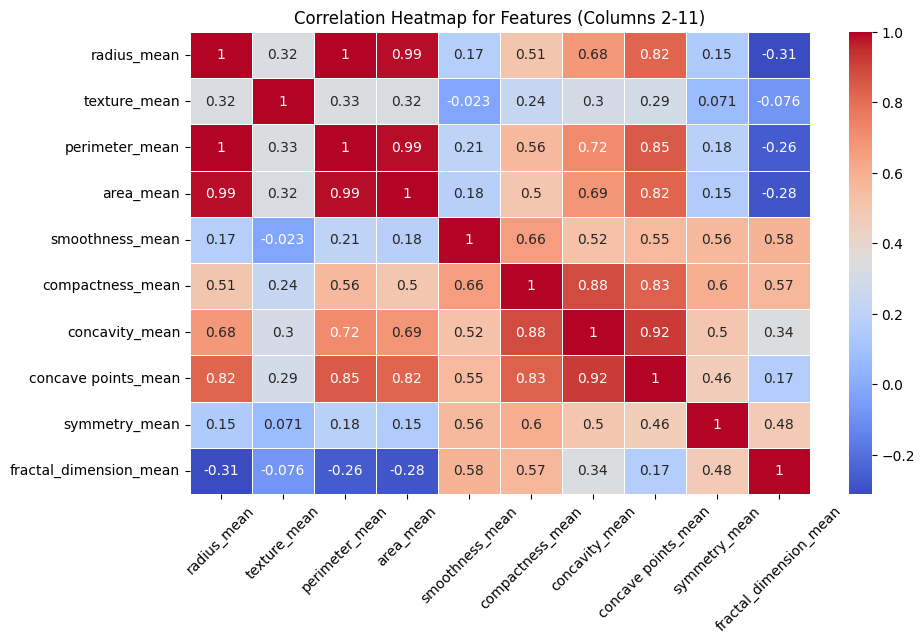

In [77]:
correlation_matrix = data.iloc[:, 2:12].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Features (Columns 2-11)')
plt.xticks(rotation=45)
plt.show()